# The Retrospective

---

## The brief

> **Client:** Rolling Beats Magazine (music publication)
>
> **Your role:** Data Journalist
>
> **Context:** Rolling Beats is preparing their "25 Years of Pop" retrospective issue. The editorial team wants data-driven stories that reveal how popular music has evolved since 2000. They're looking for surprising trends, cultural shifts, and compelling visualizations that tell the story of modern pop.
>
> You have access to 25 years of Billboard Hot 100 chart data (2000-2024), combined with Spotify's audio analysis of each track.
>
> **Your task:** Explore 25 years of chart data and uncover the stories hidden within. What trends emerge? What has changed, and what has stayed the same? Find insights that would make readers say "I never knew that."

---

## Understanding the data

This dataset spans an incredible period in music history:

- **2000**: The Napster era. CD sales at their peak.
- **2003-2010**: The iTunes revolution. Digital singles take over.
- **2010-2015**: YouTube becomes a music platform. Viral hits emerge.
- **2015-present**: Streaming dominance. Billboard changes its methodology to include streams.

### What the Billboard Hot 100 measures

The Hot 100 combines:
- **Radio airplay** (still matters!)
- **Streaming** (Spotify, Apple Music, YouTube, etc.)
- **Sales** (downloads, physical)

The formula has changed over time, which creates interesting dynamics – a streaming-era hit might look different from a radio-era hit.

## A note on data quality

- **Release dates vary**: Older songs have less precise dates (just year). Newer songs have full dates.
- **Catalog songs re-chart**: Old songs can re-enter the chart years later (TikTok effect, movie placements)
- **Christmas songs**: They return every year! December data is always unusual.
- **Methodology changes**: Billboard changed how it counts streams in 2013, 2018, and 2020.

**Tip for journalists:** Be careful about claiming trends – make sure the pattern isn't just an artifact of methodology changes!

---

## Suggested starting points

Think like a journalist. What stories would surprise readers?

- How has the **"sound" of popular music changed**? Track audio features across the decades.
- Has music gotten **more or less explicit** over time? More or less acoustic?
- Which artists **dominated each era**? Who had the longest chart presence?
- Are there **seasonal patterns** in the charts? (Christmas songs, summer anthems?)
- How long do **#1 hits** typically stay at the top? Has this changed?
- What's the average **"age" of a hit song**? Do old songs still chart? (Hint: compare release dates to chart dates)
- Have songs gotten **shorter or longer**? What about tempo – faster or slower?

**THESE ARE NOT QUESTIONS THAT I EXPECT YOU TO ANSWER, JUST IDEAS TO GET YOU STARTED.**

---

## Loading the data

In [91]:
from google.cloud.bigquery import Client
from google.auth import load_credentials_from_file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
pd.set_option('display.max_rows', None)

In [93]:
credentials, project = load_credentials_from_file("bigquery-access-key.json")

In [94]:
client = Client(
    project=project, credentials=credentials
)

In [95]:
datasets = [
    "tracks",
    "artists",
    "audio_features",
    "chart_positions",
    "tracks_artists_mapping"
]

# **A. Importing and Cleaning the Data**

## 1. Import data

In [96]:
dfs = {}

# using loop to load the dataset to dfs dictionary
for dataset in datasets:
    query = f'SELECT * FROM `hyper-python-2025.assessment.{dataset}`'
    # Store the result in the dictionary using the dataset name as the key
    dfs[dataset] = client.query(query).to_dataframe()
    print(f'Dataset loaded: {dataset}')

/opt/anaconda3/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Dataset loaded: tracks
Dataset loaded: artists
Dataset loaded: audio_features
Dataset loaded: chart_positions
Dataset loaded: tracks_artists_mapping


## 2. Checking the Data

In [97]:
type(dfs)

dict

In [98]:
dfs['tracks'].head()

,track_id,name,duration_ms,release_date,album_type,explicit
0,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False
1,4T7fVN4ZOFE3JoGyaxZL6O,Falls Apart,255160,1900-01-01,album,False
2,5CMVGP24paZIukljDj0iWc,Jingle Bells (with The Ken Lane Singers),156666,1945,compilation,False
3,04vLj9QUXoKdRlsp3gkURo,Mele Kalikimaka (Merry Christmas),175333,1945-01-01,compilation,False
4,25leEEaz1gIpp7o21Fqyjo,Here Comes Santa Claus (Right Down Santa Claus...,150266,1947,album,False


In [99]:
type(dfs['tracks'])

pandas.core.frame.DataFrame

In [100]:
# using for loops to check each df info
for name in dfs:
   datatype =  dfs[name].info()
   print(f'Above is info for {name}')
   print(datatype)
   print('--' * 50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11070 entries, 0 to 11069
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      11070 non-null  object 
 1   name          11070 non-null  object 
 2   duration_ms   11070 non-null  Int64  
 3   release_date  11070 non-null  object 
 4   album_type    11070 non-null  object 
 5   explicit      11070 non-null  boolean
dtypes: Int64(1), boolean(1), object(4)
memory usage: 465.0+ KB
Above is info for tracks
None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   artist_id   3108 non-null   object
 1   name        3108 non-null   object
 2   popularity  3108 non-null   Int64 
 3   followers   3108 non-null   Int64 
dtypes:

## 3. Check and delete duplicate

In [101]:
# Using for loop and conditional to check and remove duplicates
for name in dfs:
    # Check initial duplicates
    duplicates = dfs[name].duplicated().sum()
    print(f'{name} has total duplicates: {duplicates}')
    print('--' * 50)

    # If duplicates exist, remove them and update the dataframe
    if duplicates > 0:
        dfs[name] = dfs[name].drop_duplicates().reset_index(drop=True)
        
        # check if duplicate is removed
        removed_duplicates = dfs[name].duplicated().sum()
        print(f' --- Duplicates removed. {name} now has: {removed_duplicates}')
        print('--' * 50)

tracks has total duplicates: 287
----------------------------------------------------------------------------------------------------
 --- Duplicates removed. tracks now has: 0
----------------------------------------------------------------------------------------------------
artists has total duplicates: 0
----------------------------------------------------------------------------------------------------
audio_features has total duplicates: 6
----------------------------------------------------------------------------------------------------
 --- Duplicates removed. audio_features now has: 0
----------------------------------------------------------------------------------------------------
chart_positions has total duplicates: 0
----------------------------------------------------------------------------------------------------
tracks_artists_mapping has total duplicates: 0
----------------------------------------------------------------------------------------------------


## 4. Check and remove null value

In [102]:
# Using for loop and conditional to check and remove null
for name in dfs:
   # Check initial null value
   nullvalue =  dfs[name].isna().sum()
   print(f'{name} has total null: {nullvalue}')
   print('--' * 50)

   # If null exist, remove them and update the dataframe
   if nullvalue.sum() > 0:
       dfs[name] =  dfs[name].dropna().reset_index(drop=True)

       # check if null is removed
       removed_null = dfs[name].isna().sum()
       print(f'--- Null removed. {name} now has: {removed_null}')
       print('--' * 50)

tracks has total null: track_id        0
name            0
duration_ms     0
release_date    0
album_type      0
explicit        0
dtype: int64
----------------------------------------------------------------------------------------------------
artists has total null: artist_id     0
name          0
popularity    0
followers     0
dtype: int64
----------------------------------------------------------------------------------------------------
audio_features has total null: track_id            1
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
time_signature      1
dtype: int64
----------------------------------------------------------------------------------------------------
--- Null removed. audio_features now has: track_id            0
danceability        0
energy              0
key           

## 5. Changing date type and duration ms to duration minutes

In [103]:
# Creating new column for duration minutes
dfs['tracks']['duration_minutes'] = dfs['tracks']['duration_ms']/60000

In [104]:
# Change all date data type to datetime
dfs['tracks']['release_date'] = pd.to_datetime(dfs['tracks']['release_date'], format='mixed').dt.date
dfs['chart_positions']['chart_week'] = pd.to_datetime(dfs['chart_positions']['chart_week'], format='mixed').dt.date

In [160]:
dfs['tracks'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          10783 non-null  object 
 1   name              10783 non-null  object 
 2   duration_ms       10783 non-null  Int64  
 3   release_date      10783 non-null  object 
 4   album_type        10783 non-null  object 
 5   explicit          10783 non-null  boolean
 6   duration_minutes  10783 non-null  Float64
dtypes: Float64(1), Int64(1), boolean(1), object(4)
memory usage: 547.7+ KB


## 6. Describe all the data

In [106]:
# Using for loops to check all df describe
for name in dfs:
   describe =  dfs[name].describe()
   print(f'{name} has describe as below:')
   print(describe)
   print('--' * 50)

tracks has describe as below:
         duration_ms  duration_minutes
count        10783.0           10783.0
mean   218865.296949          3.647755
std     49161.806793          0.819363
min           7500.0             0.125
25%         189158.5          3.152642
50%         215533.0          3.592217
75%         243666.0            4.0611
max        1037906.0         17.298433
----------------------------------------------------------------------------------------------------
artists has describe as below:
       popularity       followers
count      3108.0          3108.0
mean     56.41184  2663186.675032
std     18.540857  7909020.915922
min           0.0             5.0
25%          47.0        49322.25
50%          59.0        440598.5
75%          69.0      1890975.25
max         100.0     123544806.0
----------------------------------------------------------------------------------------------------
audio_features has describe as below:
       danceability        energy         

## 7. Making each data as variable

In [107]:
tracks = dfs['tracks']
audio_features = dfs['audio_features']
artist = dfs['artists']
chart_positions = dfs['chart_positions']
tracks_artists_mapping = dfs['tracks_artists_mapping']

## h. Checking outliers for tracks data
### *Tracks data will be our primary/main data*

<Axes: xlabel='duration_minutes', ylabel='Count'>

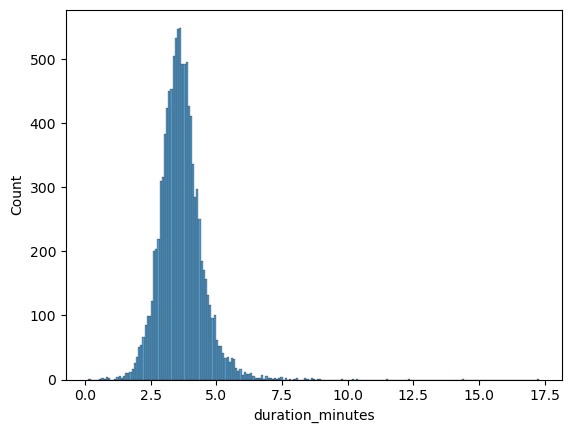

In [108]:
sns.histplot(data=tracks, x='duration_minutes')

### **Note**: As you see from the chart above that the data has right skew normal distribution or positive skew, which mean that the data mean is greater than the median, which is pulled up by large outliers

In [109]:
# Check the highest value
tracks['duration_minutes'].nlargest(5)

5325    17.298433
6727    14.357333
6420      12.3335
7706    11.474217
5257    10.335017
Name: duration_minutes, dtype: Float64

In [110]:
# Check the lowest value
tracks['duration_minutes'].nsmallest(5)

4624        0.125
5582     0.616883
65       0.649333
10709     0.69145
4438     0.770883
Name: duration_minutes, dtype: Float64

### **Note**: I decided not to remove the outlier since it will disturb my analysis where the songs is not error or mistake entry or unusual event.

## 8. Change the track artist mapping column label

### *Due to misslabeling, I need to rename to merge correctly*

In [111]:
tracks_artists_mapping.head()

,track_id,artist_id
0,00FQb4jTyendYWaN8pK0wa,4zmKGsrXjLmljb5fTaBTot
1,00FQb4jTyendYWaN8pK0wa,6GGtHZgBycCgGBUhZo81xe
2,00FQb4jTyendYWaN8pK0wa,22DH8NChecsgPxDjA4pqer
3,00FQb4jTyendYWaN8pK0wa,7JVNRVPeXFAOdMrxOHNjVv
4,00FQb4jTyendYWaN8pK0wa,24jvD83UgLmrdGjhWTFslY


In [112]:
tracks_artists_mapping.rename(columns={'track_id': 'artist_id', 'artist_id': 'track_id'}, inplace=True)

# **B. Joining the Data**

## *I will merge the data using a Left Join to retrieve information from the second DataFrame, even if it is missing data for some entries in the first.*

## 1. Join tracks and chart_position df

In [113]:
chartjointrack = pd.merge(tracks, chart_positions, on='track_id', how='left')
chartjointrack.head()

,track_id,name,duration_ms,release_date,album_type,explicit,duration_minutes,chart_week,list_position
0,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-15,27
1,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-08,31
2,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-01,36
3,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-22,37
4,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-29,40


## 2. Join chartjointrack and tracks_artists_mapping df

In [114]:
join1 =  pd.merge(chartjointrack, tracks_artists_mapping, on='track_id', how='left')
join1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175529 entries, 0 to 175528
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          175529 non-null  object 
 1   name              175529 non-null  object 
 2   duration_ms       175529 non-null  Int64  
 3   release_date      175529 non-null  object 
 4   album_type        175529 non-null  object 
 5   explicit          175529 non-null  boolean
 6   duration_minutes  175529 non-null  Float64
 7   chart_week        175529 non-null  object 
 8   list_position     175529 non-null  Int64  
 9   artist_id         175529 non-null  object 
dtypes: Float64(1), Int64(2), boolean(1), object(6)
memory usage: 12.9+ MB


## 3. Join previous merge df with artist df

In [115]:
join2 = pd.merge(join1, artist, on='artist_id', how='left')
join2.head()

,track_id,name_x,duration_ms,release_date,album_type,explicit,duration_minutes,chart_week,list_position,artist_id,name_y,popularity,followers
0,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-15,27,4uN3DsfENc7dp0OLO0FEIb,Sugar Ray,63,988880
1,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-08,31,4uN3DsfENc7dp0OLO0FEIb,Sugar Ray,63,988880
2,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-01,36,4uN3DsfENc7dp0OLO0FEIb,Sugar Ray,63,988880
3,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-22,37,4uN3DsfENc7dp0OLO0FEIb,Sugar Ray,63,988880
4,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-29,40,4uN3DsfENc7dp0OLO0FEIb,Sugar Ray,63,988880


In [116]:
# Rename the column of song name and artist name
join2.rename(columns={'name_x': 'song_name', 'name_y': 'artist_name'}, inplace=True)

In [117]:
# Checking how many singer in one song
join2[join2['song_name'] == 'Blurred Lines'].head(5)

,track_id,song_name,duration_ms,release_date,album_type,explicit,duration_minutes,chart_week,list_position,artist_id,artist_name,popularity,followers
134129,0n4bITAu0Y0nigrz3MFJMb,Blurred Lines,263826,2013-01-01,album,True,4.3971,2013-06-22,1,0ZrpamOxcZybMHGg1AYtHP,Robin Thicke,64,1947205
134130,0n4bITAu0Y0nigrz3MFJMb,Blurred Lines,263826,2013-01-01,album,True,4.3971,2013-06-22,1,2RdwBSPQiwcmiDo9kixcl8,Pharrell Williams,81,4827986
134131,0n4bITAu0Y0nigrz3MFJMb,Blurred Lines,263826,2013-01-01,album,True,4.3971,2013-06-22,1,4OBJLual30L7gRl5UkeRcT,T.I.,76,4859348
134132,0n4bITAu0Y0nigrz3MFJMb,Blurred Lines,263826,2013-01-01,album,True,4.3971,2013-06-29,1,0ZrpamOxcZybMHGg1AYtHP,Robin Thicke,64,1947205
134133,0n4bITAu0Y0nigrz3MFJMb,Blurred Lines,263826,2013-01-01,album,True,4.3971,2013-06-29,1,2RdwBSPQiwcmiDo9kixcl8,Pharrell Williams,81,4827986


### **Note**: Due to one song has three columns with different artist name and id, I decided to not include artist data in my innitial analysis and will join it later if needeed.

## 4. Join chartjointrack with audio_features df

### *This merge will be our main df for analysis*

In [118]:
join3 = pd.merge(chartjointrack, audio_features, on='track_id', how='left')
join3.head()

,track_id,name,duration_ms,release_date,album_type,explicit,duration_minutes,chart_week,list_position,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-15,27,0.745,...,1.0,-4.39,0.0,0.0287,0.0105,0.0836,0.21,0.939,110.855,4.0
1,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-08,31,0.745,...,1.0,-4.39,0.0,0.0287,0.0105,0.0836,0.21,0.939,110.855,4.0
2,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-01,36,0.745,...,1.0,-4.39,0.0,0.0287,0.0105,0.0836,0.21,0.939,110.855,4.0
3,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-22,37,0.745,...,1.0,-4.39,0.0,0.0287,0.0105,0.0836,0.21,0.939,110.855,4.0
4,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-29,40,0.745,...,1.0,-4.39,0.0,0.0287,0.0105,0.0836,0.21,0.939,110.855,4.0


### *Checking again if after merge we have duplicate and nan value*

In [119]:
join3.duplicated().sum()

np.int64(0)

In [120]:
join3.isna().sum()

track_id             0
name                 0
duration_ms          0
release_date         0
album_type           0
explicit             0
duration_minutes     0
chart_week           0
list_position        0
danceability        36
energy              36
key                 36
loudness            36
mode                36
speechiness         36
acousticness        36
instrumentalness    36
liveness            36
valence             36
tempo               36
time_signature      36
dtype: int64

In [121]:
join3[join3.isna().any(axis=1)]

,track_id,name,duration_ms,release_date,album_type,explicit,duration_minutes,chart_week,list_position,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
90555,3Dxi7H1jdRftAzpYxzUPy2,"Gotta Go My Own Way - From ""High School Musica...",222360,2024-10-14,album,False,3.706,2007-09-08,34,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90556,3Dxi7H1jdRftAzpYxzUPy2,"Gotta Go My Own Way - From ""High School Musica...",222360,2024-10-14,album,False,3.706,2007-09-01,60,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90557,3Dxi7H1jdRftAzpYxzUPy2,"Gotta Go My Own Way - From ""High School Musica...",222360,2024-10-14,album,False,3.706,2007-09-15,82,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90558,1O41wmTphd9Ykz89O0D5Fg,"This Is Me - From ""Camp Rock""",189186,2024-10-14,album,False,3.1531,2008-07-12,9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90559,1O41wmTphd9Ykz89O0D5Fg,"This Is Me - From ""Camp Rock""",189186,2024-10-14,album,False,3.1531,2008-07-05,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90560,1O41wmTphd9Ykz89O0D5Fg,"This Is Me - From ""Camp Rock""",189186,2024-10-14,album,False,3.1531,2008-07-19,29,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90561,1O41wmTphd9Ykz89O0D5Fg,"This Is Me - From ""Camp Rock""",189186,2024-10-14,album,False,3.1531,2008-07-26,57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90562,1O41wmTphd9Ykz89O0D5Fg,"This Is Me - From ""Camp Rock""",189186,2024-10-14,album,False,3.1531,2008-08-02,57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90563,1O41wmTphd9Ykz89O0D5Fg,"This Is Me - From ""Camp Rock""",189186,2024-10-14,album,False,3.1531,2008-08-09,69,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90564,1O41wmTphd9Ykz89O0D5Fg,"This Is Me - From ""Camp Rock""",189186,2024-10-14,album,False,3.1531,2008-08-16,93,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Note**: I will keep the nan value because it still relevant since the id still has the chart position

## Your analysis

*Add cells below to explore the data and create visualizations. Structure it like a magazine feature – with clear narrative sections and compelling visuals that tell a story.*

# C. *Analysis*

# **What is the sound to make number 1 hit song on Billboard? Let's track audio features accross decades to create a top hit song today.** ##

### Have you ever wondered if there is a secret recipe for a Number 1 hit? We know music feels different today than it did back in the early 2000s, but I want to see exactly how those tastes have shifted over the last 25 years. By looking at audio features, like how fast, loud, or energetic a song is, so we can actually track the "sound" of a generation.

### In this analysis for Rolling Beats, I’m going to break down the data to see what the numbers tell us about modern pop. First, I’ll look at the general trends to see how music has evolved since the turn of the millennium. Then, I will zoom in on the Number 1 hits and the longest running chart toppers to figure out if there is a specific sound that defines massive success.

## **1. Filtering the Merge Data**

### Before we get to the fun part, finding the hits, we need to do a quick health check on our data. We’re going to peek at what we’re working with, clean up any missing information and make sure we are strictly looking at that 2000–2024 window. This way, we know our "sound of success" is based on solid numbers.

In [122]:
# checking our merge data info
join3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129305 entries, 0 to 129304
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          129305 non-null  object 
 1   name              129305 non-null  object 
 2   duration_ms       129305 non-null  Int64  
 3   release_date      129305 non-null  object 
 4   album_type        129305 non-null  object 
 5   explicit          129305 non-null  boolean
 6   duration_minutes  129305 non-null  Float64
 7   chart_week        129305 non-null  object 
 8   list_position     129305 non-null  Int64  
 9   danceability      129269 non-null  float64
 10  energy            129269 non-null  float64
 11  key               129269 non-null  float64
 12  loudness          129269 non-null  float64
 13  mode              129269 non-null  float64
 14  speechiness       129269 non-null  float64
 15  acousticness      129269 non-null  float64
 16  instrumentalness  12

In [123]:
# making new column for year only
join3['chart_week'] = pd.to_datetime(join3['chart_week'])
join3['year'] = join3['chart_week'].dt.year
join3.head()

,track_id,name,duration_ms,release_date,album_type,explicit,duration_minutes,chart_week,list_position,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-15,27,0.745,...,-4.39,0.0,0.0287,0.0105,0.0836,0.21,0.939,110.855,4.0,2000
1,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-08,31,0.745,...,-4.39,0.0,0.0287,0.0105,0.0836,0.21,0.939,110.855,4.0,2000
2,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-01,36,0.745,...,-4.39,0.0,0.0287,0.0105,0.0836,0.21,0.939,110.855,4.0,2000
3,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-22,37,0.745,...,-4.39,0.0,0.0287,0.0105,0.0836,0.21,0.939,110.855,4.0,2000
4,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,4.046667,2000-01-29,40,0.745,...,-4.39,0.0,0.0287,0.0105,0.0836,0.21,0.939,110.855,4.0,2000


### In the dataframe, we observed that single songs appear in multiple chart weeks with different positions, yet their audio features remain identical. This duplication distorts the analysis. Therefore, we need to filter the data to keep only the first date of appearance for each song. However, if a song reappears after a significant gap (a year or more), we will treat it as a new entry and retain it.

### We also need to exclude Chrismast songs which they usually re-appear every years and it can be ruining our analysis

In [124]:
# Sort by track_id and date to shift it
filltered_join3 = join3.sort_values(by=['track_id', 'chart_week']).reset_index(drop=True)

# Compare the current week to the previous week for the same song
filltered_join3['prev_week'] = filltered_join3.groupby('track_id')['chart_week'].shift(1)
filltered_join3['weeks_gap'] = (filltered_join3['chart_week'] - filltered_join3['prev_week']).dt.days / 7

In [125]:
len(filltered_join3)

129305

In [126]:
# Creating variable for christmas words
christmas_words = ['Christmas', 'Santa', 'Holiday', 'Sleigh', 'Snow', 'Merry', 'Jingle', 'Winter', 'Noel', 'Feliz']

# Df without chrismast songs
filltered_join3=filltered_join3[~filltered_join3['name'].str.contains('|'.join(christmas_words), case=False, na=False)].reset_index(drop=True)

In [127]:
len(filltered_join3)

128354

In [128]:
filltered_join3.head()

,track_id,name,duration_ms,release_date,album_type,explicit,duration_minutes,chart_week,list_position,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,prev_week,weeks_gap
0,000TJlEJQ3nafsm1hBWpoj,LEMONHEAD (feat. 42 Dugg),130979,2023-03-31,album,True,2.182983,2021-07-10,42,0.620,...,0.2120,0.155000,0.000,0.5350,0.487,137.131,4.0,2021,NaT,NaN
1,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3.887767,2003-06-21,71,0.553,...,0.0318,0.000065,0.128,0.0385,0.318,127.947,4.0,2003,NaT,NaN
2,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3.887767,2003-06-28,67,0.553,...,0.0318,0.000065,0.128,0.0385,0.318,127.947,4.0,2003,2003-06-21,1.0
3,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3.887767,2003-07-05,67,0.553,...,0.0318,0.000065,0.128,0.0385,0.318,127.947,4.0,2003,2003-06-28,1.0
4,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3.887767,2003-07-12,66,0.553,...,0.0318,0.000065,0.128,0.0385,0.318,127.947,4.0,2003,2003-07-05,1.0


In [129]:
# Keep the row if it's the First Ever appearance (NaN) OR a Revival (> 52 weeks gap)
filltered_join3['chart_entry'] = (filltered_join3['weeks_gap'].isna()) | (filltered_join3['weeks_gap'] > 52)

In [130]:
filltered_join3.head()

,track_id,name,duration_ms,release_date,album_type,explicit,duration_minutes,chart_week,list_position,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,prev_week,weeks_gap,chart_entry
0,000TJlEJQ3nafsm1hBWpoj,LEMONHEAD (feat. 42 Dugg),130979,2023-03-31,album,True,2.182983,2021-07-10,42,0.620,...,0.155000,0.000,0.5350,0.487,137.131,4.0,2021,NaT,NaN,True
1,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3.887767,2003-06-21,71,0.553,...,0.000065,0.128,0.0385,0.318,127.947,4.0,2003,NaT,NaN,True
2,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3.887767,2003-06-28,67,0.553,...,0.000065,0.128,0.0385,0.318,127.947,4.0,2003,2003-06-21,1.0,False
3,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3.887767,2003-07-05,67,0.553,...,0.000065,0.128,0.0385,0.318,127.947,4.0,2003,2003-06-28,1.0,False
4,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3.887767,2003-07-12,66,0.553,...,0.000065,0.128,0.0385,0.318,127.947,4.0,2003,2003-07-05,1.0,False


In [131]:
# Create new dataframe contains only twith filltered songs
filltered_songs = filltered_join3[filltered_join3['chart_entry']].copy().reset_index(drop=True)
filltered_songs.head()

,track_id,name,duration_ms,release_date,album_type,explicit,duration_minutes,chart_week,list_position,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,prev_week,weeks_gap,chart_entry
0,000TJlEJQ3nafsm1hBWpoj,LEMONHEAD (feat. 42 Dugg),130979,2023-03-31,album,True,2.182983,2021-07-10,42,0.620,...,0.155000,0.000,0.5350,0.487,137.131,4.0,2021,NaT,NaN,True
1,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",233266,2002-10-15,album,False,3.887767,2003-06-21,71,0.553,...,0.000065,0.128,0.0385,0.318,127.947,4.0,2003,NaT,NaN,True
2,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,222973,2004-01-01,album,False,3.716217,2005-02-12,40,0.352,...,0.001210,0.000,0.0995,0.236,148.033,4.0,2005,NaT,NaN,True
3,005lwxGU1tms6HGELIcUv9,I Kissed A Girl,179640,2008-06-17,album,False,2.994,2008-05-24,76,0.702,...,0.002260,0.000,0.1320,0.696,129.996,4.0,2008,NaT,NaN,True
4,009ImBOrIUlWgla8U05RAC,Unconditionally,228878,2013-01-01,album,False,3.814633,2013-11-09,30,0.432,...,0.002730,0.000,0.2080,0.353,128.902,4.0,2013,NaT,NaN,True


In [132]:
len(filltered_songs)

10895

## **2. General Sound Trends Across the Billboard Chart**

## **a. How do the audio features on the Billboard chart change over the years?**

### With the data clean, let's step back and look at the big picture. We want to understand how the actual "sound" of the charts has shifted from the 2000s to today. To do this, I’m going to track six specific audio traits: danceability, energy, valence, acousticness, instrumentalness, and speechiness.

### I’ll compare these features across the decades to spot the major trends. Are hits getting sadder? Is the energy dropping? By graphing these out, we can see which musical ingredients define each era and how the recipe for popular music has evolved over time.

In [133]:
# Creating variable for spesific audio features tha show if the songs is slow or dance songs
features_1 = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'speechiness']

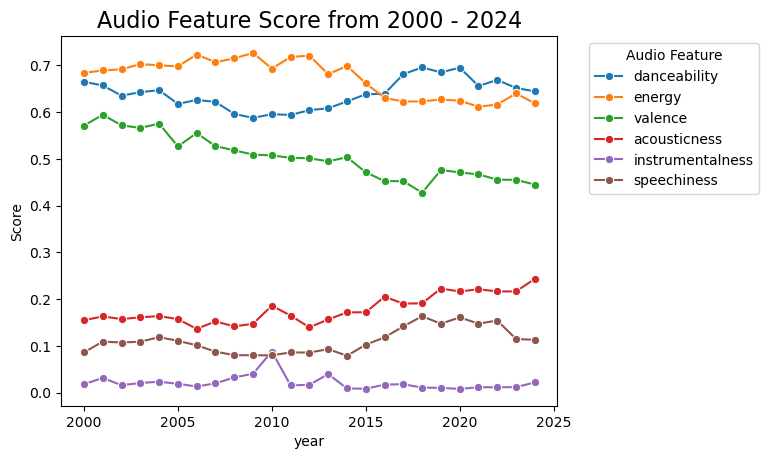

In [134]:
# Find the mean of our audio features grouping by year
yearly_sound1 = filltered_songs.groupby('year')[features_1].mean().reset_index()

# Melting our mean data set to create line plot
melted_yearly_sound1 = yearly_sound1.melt(id_vars='year', var_name='Audio Feature', value_name='Score')

# Creating line plot
sns.lineplot(data=melted_yearly_sound1, x='year', y='Score', hue='Audio Feature', marker='o')
plt.title("Audio Feature Score from 2000 - 2024", fontsize=16)
plt.legend(title='Audio Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### *Findings*: 

### Looking at the last 25 years, the biggest story here is a major "vibe shift" that started around 2010. Before then, hits were generally high-energy and happy, but the chart shows a clear downward slide for both energy (orange) and positivity (green). We are literally listening to sadder, calmer music than we did a decade ago. Interestingly, even though the songs have chilled out, we haven't stopped moving, danceability (blue) has stayed consistently high. Essentially, modern pop has figured out how to make us dance even when the mood is down.

### So, what replaced that high energy? As the loud, electric sounds faded, they were replaced by more "acoustic" (red) and raw elements. You can also see a real jump in "speechiness" (brown) starting around 2015. This lines up perfectly with the explosion of trap and hip-hop on the charts. It tells us that while pop music has become quieter and moodier, it has also become more focused on rhythm and lyrics rather than just big, loud production.

## **b. Let's see how audio features on the Billboard chart have changed over the decades.**

### To really understand the "sound" of popular musics, we need to see how these features interact with one another. I’m going to set up three specific face-offs: Acousticness vs. Danceability, Valence vs. Energy, and Speechiness vs. Instrumentalness. Before we chop the data up by decade, we’ll look at all 25 years at once to establish the "ground rules" for how these musical elements balance each other out.

### Why does this matter? Because seeing these features side-by-side reveals the formula of a hit song. It helps us understand the rules artists are playing by or breaking. For instance, can a song be acoustic and still make people dance? Do high-energy songs always have to be happy? By checking these relationships, we can see which ingredient combinations create a winning formula and which ones just don't mix.

In [135]:
# Creating new column for decade
filltered_songs['decade'] = (filltered_songs['year'] // 10) * 10

# Creating function for graph all the years
def joinplot (df, xcol, ycol, color, title):
    sns.jointplot(data=df, x=xcol, y=ycol, kind='hex', color=color)
    plt.title(title, y=1.2)

# Creating function for graph decades
def decadeplot (df, xcol, ycol, groupcol, color):
    graph = sns.FacetGrid(df, col=groupcol, col_wrap=3, height=5)
    graph.map(sns.scatterplot, xcol, ycol, s=30, alpha=0.4, color=color)

### **1. Acousticness vs Danceability across all Billboard chart**

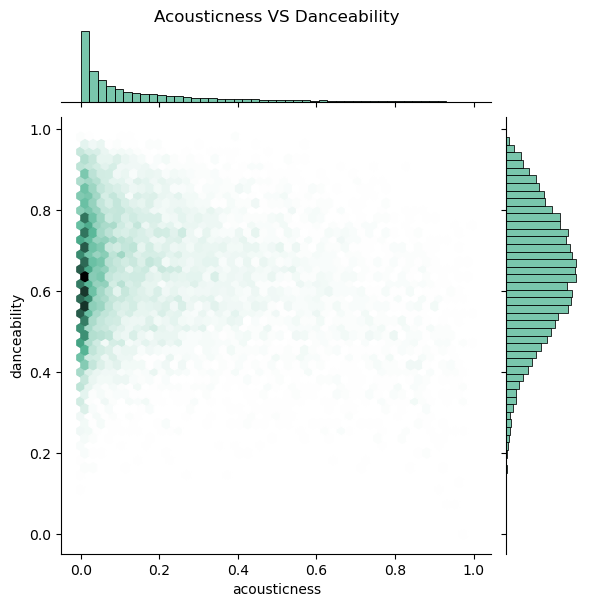

In [136]:
joinplot(filltered_songs,'acousticness','danceability','#4CB391','Acousticness VS Danceability')

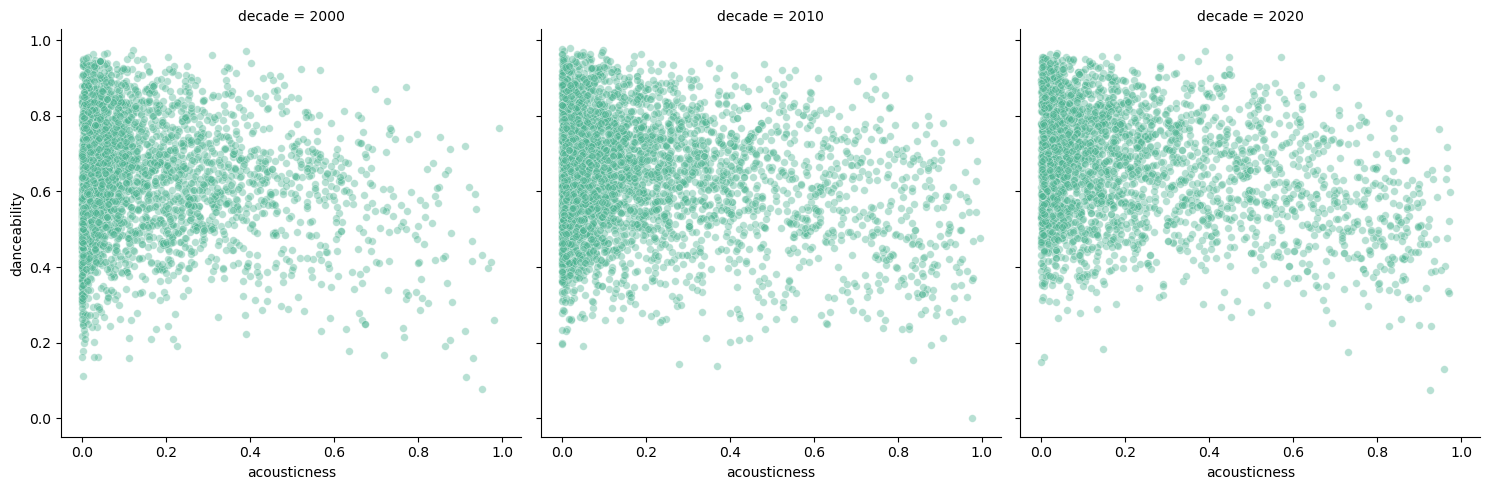

In [137]:
decadeplot(filltered_songs,'acousticness', 'danceability', 'decade', '#4CB391')

### *Findings*: 

### When we look at the relationship between acoustic sounds and danceability, the "rules" for a hit song have become very clear over the last 25 years. The main view shows us that popular music is overwhelmingly defined by heavy studio production and strong beats. You can see a massive, dense block of songs on the left side of the chart, which tells us that raw, unplugged songs rarely make it to the top anymore. The industry has largely decided that if you want a hit, it needs to be electronic and danceable.abs

### However, the timeline reveals a fascinating twist in the story. In the 2000s, the charts were dominated by that heavy production style, but as we look at the 2010s and 2020s, we actually see a shift back toward the organic. That "cloud" of acoustic dots isn't disappearing; it is slowly growing again. The data shows that over the last decade, we have been gradually moving away from strictly digital beats, making more room for stripped-back, acoustic songs to find their way back to the top of the charts.

### **2. Valence vs Energy across all Billboard chart**

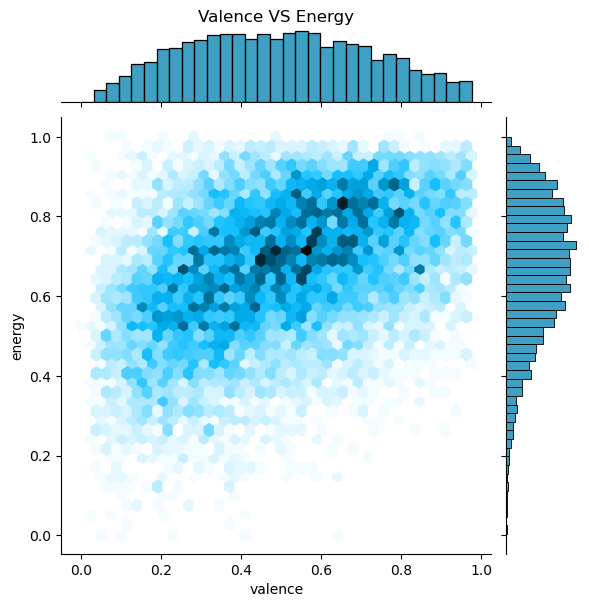

In [138]:
joinplot(filltered_songs,'valence','energy','#0080af', 'Valence VS Energy')

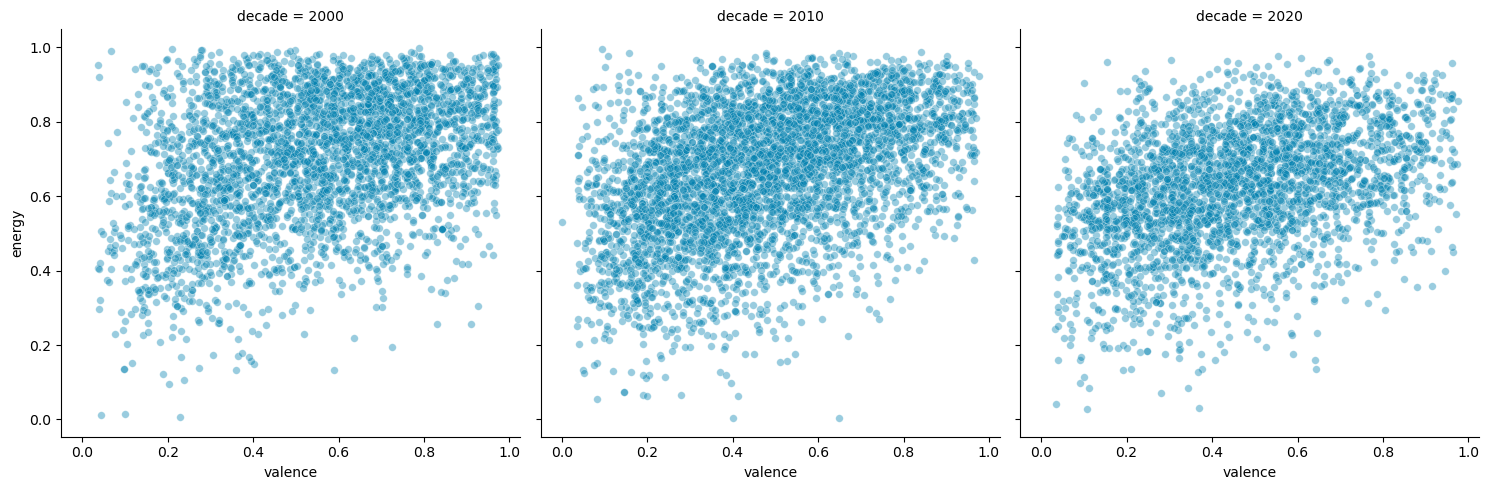

In [139]:
decadeplot(filltered_songs,'valence', 'energy', 'decade', '#0080af')

### *Findings*: 

### If you look at the energy levels, the pulse of popular music has barely skipped a beat in 25 years. The charts are consistently dominated by songs that are loud, fast, and driven by heavy production, leaving very little room for quiet moments. The data confirms that the industry has held onto one golden rule for decades: if you want a hit, you need to keep the intensity high.

### But while the tempo has stayed furious, the vibes have gotten a lot darker. Back in the 2000s and 2010s, high-energy songs were usually happy songs. The 2020s, however, have flipped that script. We are seeing a clear shift toward "sadness" without slowing down the beat. This has created a very specific modern sound: the "sad banger." We are listening to music that feels emotionally heavy and heartbroken, yet it’s still fast enough to play at a club.   

### **3. Speechiness vs Instrumentalness across all Billboard chart**

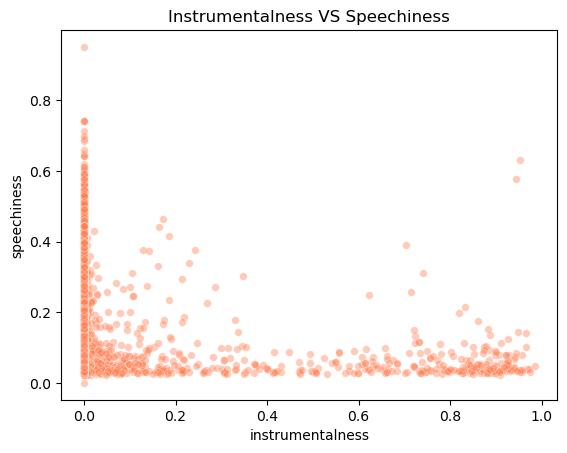

In [140]:
# Due to error with the instrumentallness that doesn't show on the joinplot, I decided to use scatterplot instead
sns.scatterplot(data=filltered_songs, x='instrumentalness', y='speechiness', s=30, alpha=0.4, color='#ff7f50')
plt.title('Instrumentalness VS Speechiness')
plt.show()

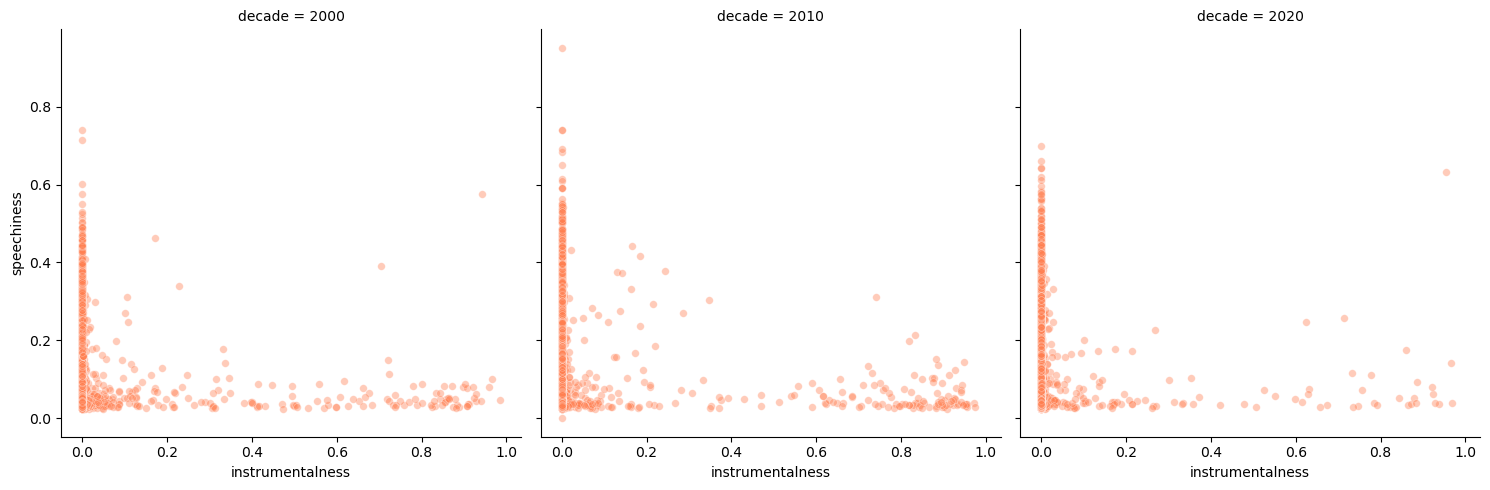

In [141]:
decadeplot(filltered_songs,'instrumentalness', 'speechiness', 'decade', '#ff7f50')

### *Findings*: 

### The charts clearly show that popular music is almost entirely driven by vocals, with instrumental-only tracks being virtually impossible to find. Whether it’s a melody or a rap verse, the visual is undeniable: almost every single hit song crowds the left side of the graph, leaving the "instrumental" side completely empty. Essentially, if you don't have a singer or rapper front and center, you aren't getting on the charts.

### What is remarkable is how stubborn this trend is. Through the 2000s, 2010s, and 2020s, the reliance on lyrics hasn’t wavered at all. While we do see the "speechiness" scores jumping around, likely thanks to the changing styles of hip-hop and rap, the instrumental scores remain flat at zero. It seems that no matter how much production styles evolve, the one non-negotiable requirement for a modern hit is that someone has to be singing or speaking on the track.

### **4. How about axplicity across all Billboard chart?**

### Since the charts are dominated by songs heavy on lyrics and "speechiness," it leads us to a pretty interesting question about the content itself. Are the hits getting rawer and ruder, or are they keeping it clean? Let's take a look at how explicit our music has really become.

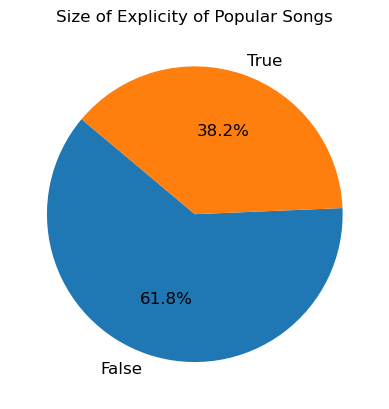

In [142]:
# Counting Explicit total number
explicity = filltered_songs['explicit'].value_counts(normalize=True)

# Creating pie plot
plt.pie(explicity, 
        labels=explicity.index, 
        autopct='%1.1f%%', # Adds percentages
        startangle=140,
        textprops={'fontsize': 12}) 
plt.title('Size of Explicity of Popular Songs')
plt.show()

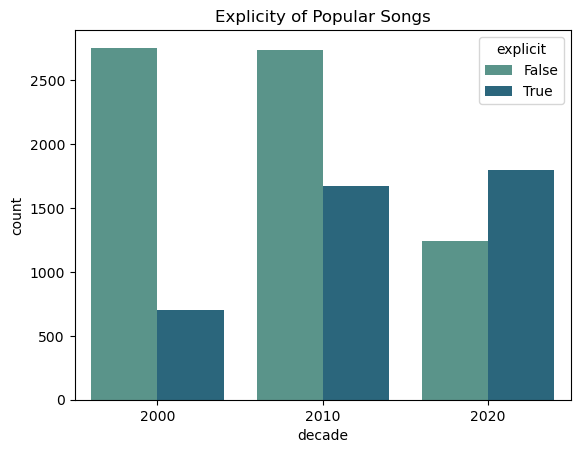

In [143]:
# Counting Explicit total number by decades
explicity_decade = filltered_songs.groupby('decade')['explicit'].value_counts().reset_index()

# Creating bar plot
sns.barplot(data=explicity_decade, x='decade', y='count', hue='explicit', palette='crest')
plt.title('Explicity of Popular Songs')
plt.show()

### *Findings*: 

### When we look at the last 25 years as a whole, it seems like popular music is mostly polite, with 62% of all songs being clean. However, digging into the timeline reveals a massive shift in what we listen to. Back in the 2000s, the charts were almost entirely "safe for work," with explicit songs making up only about 20% of the hits. At that time, hearing a parental advisory warning on a top hit was actually the exception, not the rule.

### But that balance began to tip in the 2010s, and by the 2020s, the tables completely turned. The data shows that explicit songs have overtaken clean ones, now accounting for nearly 60% of the music on the charts. We have gone from a world where swearing was rare on the radio to a new reality where explicit lyrics are the standard, showing a complete reversal in what defines a mainstream hit.

### **So based on all the findings above, what sound that we need to have to atleast make it to the billboard chart?**

### a) Based on the last twenty-five years of data, the blueprint for a modern chart-topper is built on a specific contradiction known as the "sad banger." To create a winning sound today, you must combine a melancholic and emotionally heavy atmosphere with a relentless, high-energy beat. The days of pure, happy pop anthems have faded, replaced by music that feels darker and calmer yet remains impossible not to dance to. This formula requires you to keep the production electronic and rhythmic while ensuring the vocals are front and center, as the charts offer almost no room for instrumental tracks.

### b) The attitude of the music has also undergone a complete reversal. While the hit songs of the past were largely polite and clean, the current winning formula favors the raw and the explicit. The data shows that the most successful songs now lean heavily into "speechiness" and mature themes, driven by the influence of hip-hop and trap. This means that to reach number one today, you should not be afraid to use explicit lyrics or stripped-back acoustic elements, as listeners now prefer a sound that feels honest and gritty rather than perfectly polished and safe.

## 3. **The Sound of a Number 1 Hit on the Billboard Chart**

### Now, let’s zoom in on the true winners. We have seen what popular music sounds like in general, but reaching Number 1 is a completely different game. We want to find out if there is a secret recipe for reaching the very top. By stripping away the rest and focusing only on the chart-toppers, we can track exactly how the "perfect hit" has evolved from the 2000s to today. We will compare these trends across the decades to see if the winners are getting faster or sadder, helping us understand what it really takes to become the biggest song in the world.

## **a. Filtering data**

### Before we go into our analysis we need to filter the song with only number 1 rank and do the same thing like before where we filtering the data with no christmas songs, and only have first date of appearance of the songs.

In [144]:
# Filtering only number 1 songs
number1 = join3[join3['list_position'] == 1]
number1.head(5)

,track_id,name,duration_ms,release_date,album_type,explicit,duration_minutes,chart_week,list_position,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
332,2EjXfH91m7f8HiJN1yQg97,Rockin' Around The Christmas Tree,126266,1964-10-19,album,False,2.104433,2023-12-09,1,0.598,...,-8.744,1.0,0.0496,0.617,0.0,0.5050,0.879,67.086,4.0,2023
333,2EjXfH91m7f8HiJN1yQg97,Rockin' Around The Christmas Tree,126266,1964-10-19,album,False,2.104433,2023-12-16,1,0.598,...,-8.744,1.0,0.0496,0.617,0.0,0.5050,0.879,67.086,4.0,2023
334,2EjXfH91m7f8HiJN1yQg97,Rockin' Around The Christmas Tree,126266,1964-10-19,album,False,2.104433,2024-01-06,1,0.598,...,-8.744,1.0,0.0496,0.617,0.0,0.5050,0.879,67.086,4.0,2024
835,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,241106,1994-10-28,album,False,4.018433,2022-01-01,1,0.336,...,-7.463,1.0,0.0384,0.164,0.0,0.0708,0.350,150.273,4.0,2022
836,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,241106,1994-10-28,album,False,4.018433,2022-01-08,1,0.336,...,-7.463,1.0,0.0384,0.164,0.0,0.0708,0.350,150.273,4.0,2022


In [145]:
# Sort by track_id and date to shift it
filltered_number1 = number1.sort_values(by=['track_id', 'chart_week']).reset_index(drop=True)

# Compare the current week to the previous week for the same song
filltered_number1['prev_week'] = filltered_number1.groupby('track_id')['chart_week'].shift(1)
filltered_number1['weeks_gap'] = (filltered_number1['chart_week'] - filltered_number1['prev_week']).dt.days / 7

# Filtered songs with no christmast words
filltered_number1=filltered_number1[~filltered_number1['name'].str.contains('|'.join(christmas_words), case=False, na=False)].reset_index(drop=True)

# Keep the row if it's the first ever appearance (NaN) OR a revival (> 52 weeks gap or a year)
filltered_number1['chart_entry'] = (filltered_number1['weeks_gap'].isna()) | (filltered_number1['weeks_gap'] > 52)

# Create new dataframe contains only twith filltered songs
filltered_number1 = filltered_number1[filltered_number1['chart_entry']].copy().reset_index(drop=True)
filltered_number1.head()

,track_id,name,duration_ms,release_date,album_type,explicit,duration_minutes,chart_week,list_position,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,prev_week,weeks_gap,chart_entry
0,005lwxGU1tms6HGELIcUv9,I Kissed A Girl,179640,2008-06-17,album,False,2.994,2008-07-05,1,0.702,...,0.00226,0.00000,0.1320,0.696,129.996,4.0,2008,NaT,NaN,True
1,01XFgRZfZI7oBagNf1Loml,Harlem Shake,196664,2013-02-12,single,False,3.277733,2013-03-02,1,0.452,...,0.01110,0.00182,0.4160,0.282,137.825,4.0,2013,NaT,NaN,True
2,02VBYrHfVwfEWXk5DXyf0T,Leave The Door Open,242096,2021-11-11,album,False,4.034933,2021-04-17,1,0.586,...,0.18200,0.00000,0.0927,0.719,148.088,4.0,2021,NaT,NaN,True
3,04KTF78FFg8sOHC1BADqbY,Hot In Herre,228240,2002-06-25,album,True,3.804,2002-06-29,1,0.956,...,0.20400,0.00000,0.0615,0.911,107.075,4.0,2002,NaT,NaN,True
4,09CtPGIpYB4BrO8qb1RGsF,Sorry,200786,2015-11-13,album,False,3.346433,2016-01-23,1,0.655,...,0.07970,0.00000,0.2990,0.409,99.947,4.0,2016,NaT,NaN,True


## **b. How Number 1 Songs Sound Over the Years**

### To find the secret formula for a Number 1 hit, we will focus on the winners audio features. By tracking six specific traits—danceability, energy, valence, acousticness, instrumentalness, and speechiness, so we can see exactly how the sound of success has evolved. This analysis reveals how the ingredients of a chart-topper have shifted from  2000 to 2024 to create the biggest songs in the world.

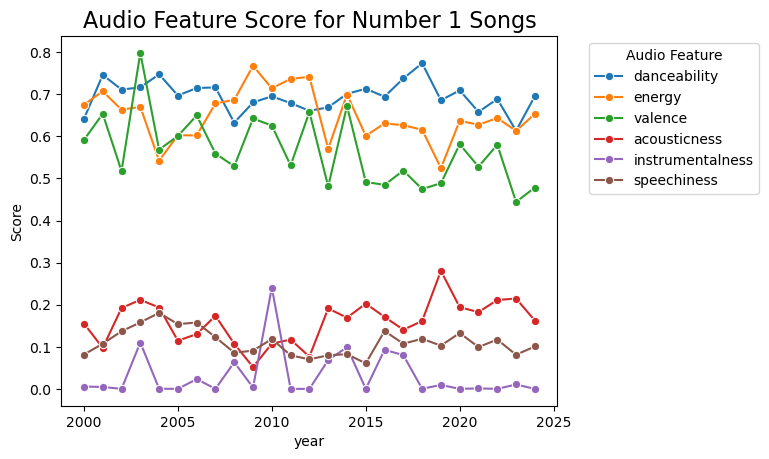

In [146]:
# Find the mean for number 1 songs by year
number1_soundyearly = filltered_number1.groupby('year')[features_1].mean().reset_index()

# Melting the df to create line plot
melted_number1_soundyearly = number1_soundyearly.melt(id_vars='year', var_name='Audio Feature', value_name='Score')

# Creating line plot
sns.lineplot(data=melted_number1_soundyearly, x='year', y='Score', hue='Audio Feature', marker='o')
plt.title("Audio Feature Score for Number 1 Songs", fontsize=16)
plt.legend(title='Audio Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### *Findings* :

### Since 2000, valence has fallen significantly, which shows that chart topping songs have become much less cheerful. We also see a recent drop in energy levels, suggesting that the loud and intense production style of the past is giving way to a calmer sound at the top of the charts.

### Even though the music is getting mellower, the rhythm remains a priority. The data shows that danceability stays high, so the beat is still essential for a Number 1 song. At the same time, the line for acoustic music is slowly climbing upward. This tells us that the modern hit song is finding a new balance by blending these more relaxed and organic sounds with a steady groove rather than relying on pure high energy.

## **c. Evolution of Audio Features in Number 1 Songs Billboard Chart Over the Decades**

### To understand how the "winning sound" has evolved, we need to look at the decades side by side. By comparing the audio features of Number 1 songs across the 2000s, 2010s, and 2020s, we can trace the clear shifts in what listeners want.

In [147]:
# Creating new column decade for filltered_number1 df
filltered_number1['decade'] = (filltered_number1['year'] // 10) * 10

### **1. Number 1 Hit Songs: Acousticness vs Danceability**

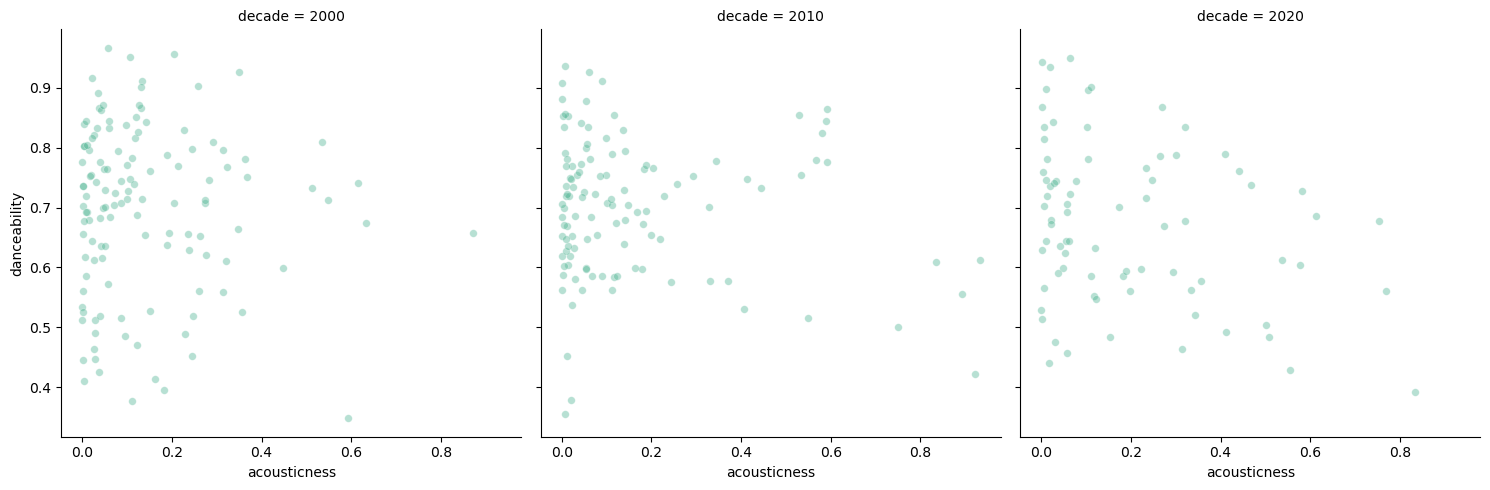

In [148]:
decadeplot(filltered_number1,'acousticness', 'danceability', 'decade', '#4CB391')

### *Findings*: 

### The data shows that the vast majority of Number 1 hits are packed tightly into the top left corner. This tells us that to reach the summit of the charts, a song almost always needs to be highly danceable while keeping acoustic instruments to a minimum. The formula is clear and consistent: the main lane for a massive hit is overwhelmingly rhythmic and heavily produced.

### This pattern holds strong across every decade, but the timeline does show a small shift in recent years. While the 2000s and 2010s were locked into that high energy sound, the 2020s display a few more scattered dots drifting toward the right side. This indicates that a handful of acoustic tracks are finally managing to break through to Number 1. However, these are still rare exceptions, proving that while the door is slightly open for acoustic ballads, the industry still heavily favors the electronic beat.

### **2. Number 1 Hit Songs: Valence vs Energy**

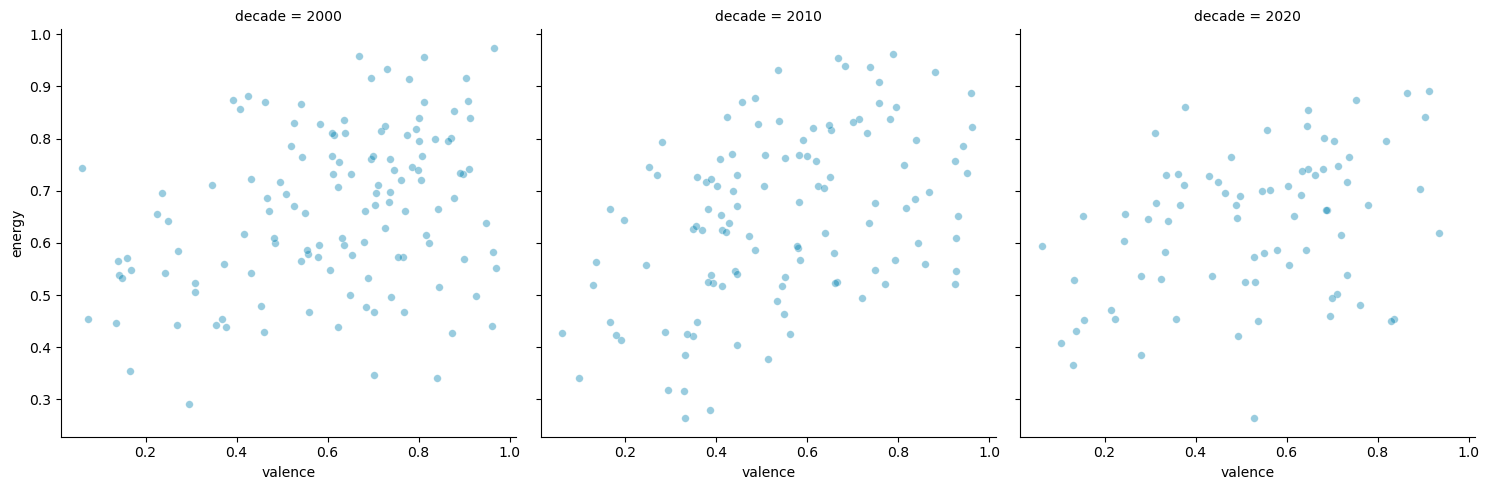

In [149]:
decadeplot(filltered_number1,'valence', 'energy', 'decade', '#0080af')

### *Findings*: 

### The graph reveals a strong link between how happy a song feels and how much energy it carries. We can see that brighter and happier tracks almost always come with a higher level of intensity. In the early years of the millennium, the chart reflects a time of celebration where the biggest hits were clustered high up in the corner. This shows us that the 2000s were defined by loud and joyful party anthems that refused to slow down.

### However, the mood has shifted significantly as we arrive in the 2020s. The data points have drifted downward and to the left, signaling a major change in the atmosphere of popular music. This movement tells us that the high energy pop explosions of the past have faded away. They have been replaced by a new wave of Number 1 hits that are decidedly calmer, sadder, and more introspective than the music that dominated previous decades.

### **3. Number 1 Hit Songs: Speechiness vs Instrumentalness**

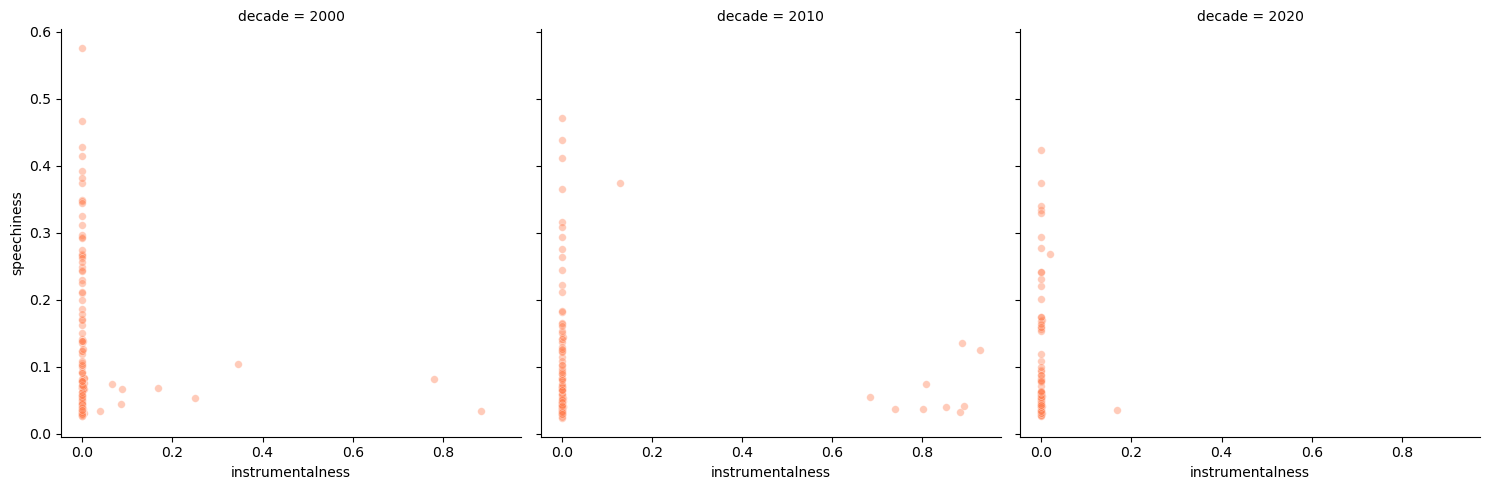

In [150]:
decadeplot(filltered_number1,'instrumentalness', 'speechiness', 'decade', '#ff7f50')

### *Findings*:

### When we examine the balance between lyrics and instruments, we see that the human voice is the undeniable star of the show. Almost every single Number 1 hit is clustered tightly on the far left side of the chart, which indicates that songs with high instrumental scores are practically nonexistent. The industry has effectively decided that a massive hit requires a vocal performance, leaving almost no room for purely instrumental tracks to compete at this level.

### This preference for vocals has stayed remarkably solid through the years. While we do see a wide range of speechiness scores showing a healthy mix of melodic singing and rhythmic rap, the reliance on the voice itself has not wavered. The pattern looks nearly identical across all three decades, proving that while musical styles and production techniques may evolve, the fundamental requirement for a hit song to feature a prominent human voice is a rule that never changes.

### **4. Number 1 Hit Songs: explicity**

### With so much singing in every hit, the lyrics matter a lot. It is time to see if the biggest songs in the world are polite or not. We need to find out if being explicit is a problem for a hit song or if it is just part of the music now.

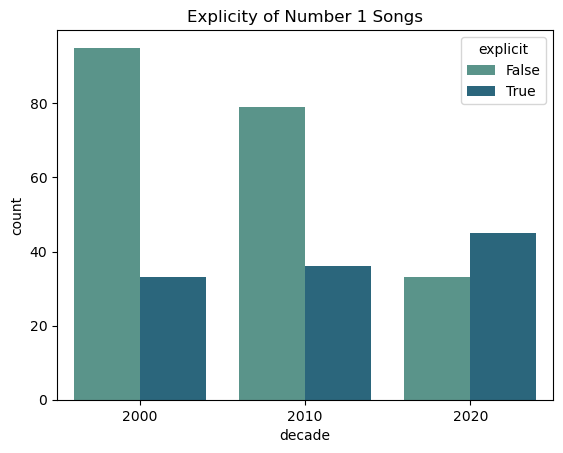

In [151]:
# Find the total number of explicity for each decade
explicity_number1 = filltered_number1.groupby('decade')['explicit'].value_counts().reset_index()

# Making bar plot
sns.barplot(data=explicity_number1, x='decade', y='count', hue='explicit', palette='crest')
plt.title('Explicity of Number 1 Songs')
plt.show()

### *Findings*: 

### This chart shows a major shift in the lyrics of number one hits over the last few decades. Back in the 2000s and 2010s, the vast majority of top songs were "clean," with non-explicit tracks far outnumbering the explicit ones. However, by the 2020s, that trend completely flipped. For the first time, explicit songs are now more common than clean ones at the top of the charts. This tells us that mainstream music has become much more comfortable with explicit content, effectively making it the new standard for a massive hit.

### **5.Let's Dig More to Get the Magic Score for Audio Features for The Number 1 Hits**

### We know how these songs feel and what they say but now we want to know what makes them tick. It is time to crack open the structure to look at the speed and the musical key. We want to find out if there is a specific tempo that makes a song irresistible or a magic key that unlocks the top of the chart

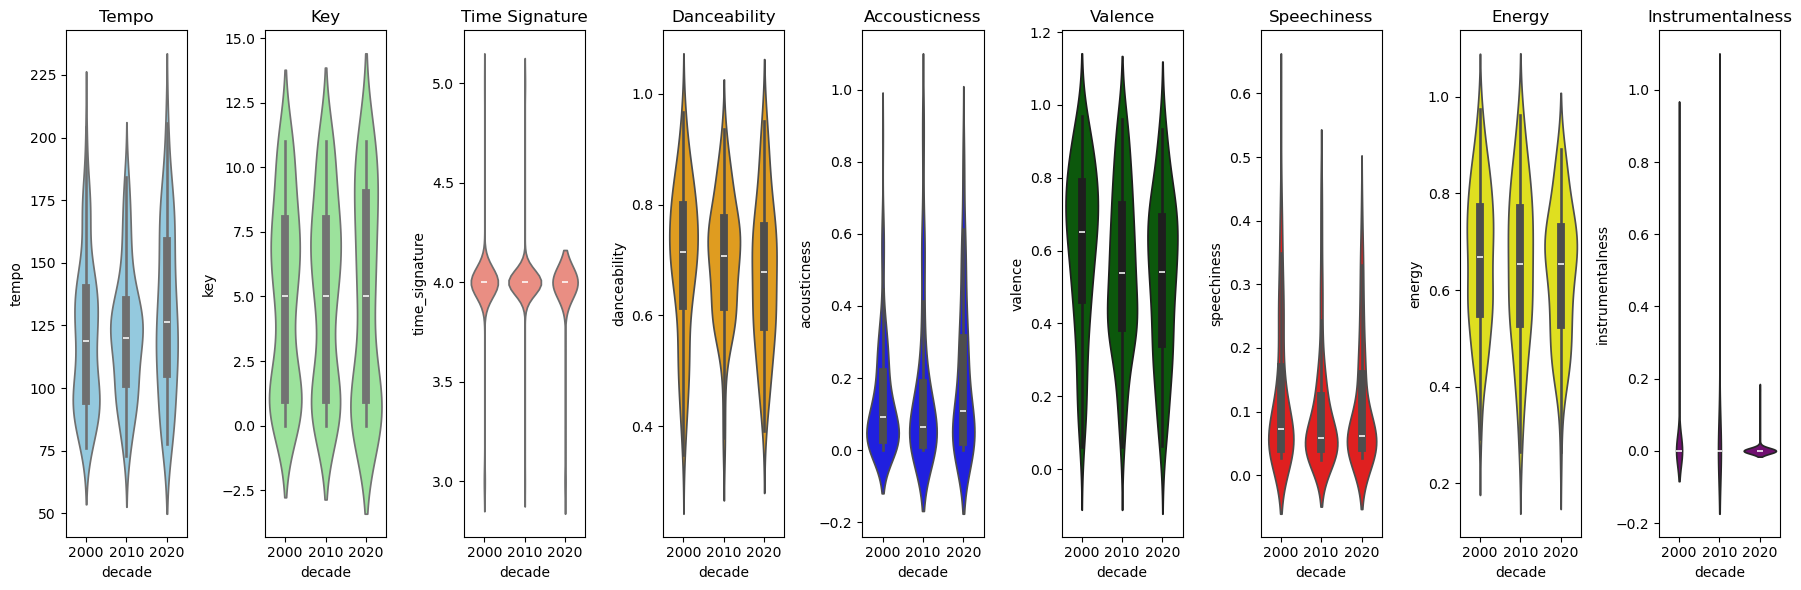

In [152]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(1, 9, figsize=(18, 6))

# Tempo
sns.violinplot(data=filltered_number1, x='decade', y='tempo', ax=ax1, color='skyblue')
ax1.set_title('Tempo')

# Key
sns.violinplot(data=filltered_number1, x='decade', y='key', ax=ax2, color='lightgreen')
ax2.set_title('Key')

# Time Signature
sns.violinplot(data=filltered_number1, x='decade', y='time_signature', ax=ax3, color='salmon')
ax3.set_title('Time Signature')

# Danceability
sns.violinplot(data=filltered_number1, x='decade', y='danceability', ax=ax4, color='orange')
ax4.set_title('Danceability')

# Acousticness
sns.violinplot(data=filltered_number1, x='decade', y='acousticness', ax=ax5, color='blue')
ax5.set_title('Accousticness')

# Valencet
sns.violinplot(data=filltered_number1, x='decade', y='valence', ax=ax6, color='darkgreen')
ax6.set_title('Valence')

# Speechiness
sns.violinplot(data=filltered_number1, x='decade', y='speechiness', ax=ax7, color='red')
ax7.set_title('Speechiness')

# Energy
sns.violinplot(data=filltered_number1, x='decade', y='energy', ax=ax8, color='yellow')
ax8.set_title('Energy')

# Instrumentalness
sns.violinplot(data=filltered_number1, x='decade', y='instrumentalness', ax=ax9, color='purple')
ax9.set_title('Instrumentalness')

plt.tight_layout()
plt.show()

### *Findings*

### The data confirms that there is a specific tempo that drives the modern hit. The speed has shifted up to atleast 128 BPM, which works in perfect sync with a danceability score of over 0.700. This specific combination of high speed and extreme movement is what makes the song irresistible to a generation that demands a relentless electronic beat.

### We also discovered magic key that unlocks the top of the chart where exact same musical keys over decades (specifically clustering around 0/C, 2/D, 5/F, 7/G, and 9/A) but center at number 5/F as the hidden foundation.The valence score is shifting to lower score 0.500. This precise mix allows the song to feel catchy and familiar while capturing the moody, introspective atmosphere that listeners crave.

### The data also shows that to make a hit tick, you must lock the rhythm to a time signature of 4 beats per measure and ensure the instrumentalness is flat at 0.0. To make this mix work you must also rely on heavy production. The energy score needs to be high, atleast between 0.6 to 0.8 to ensure the relentless electronic beat drives the track forward even when the emotional tone is sad.


### **Now based on all findings above we can make formula to make top hit songs**

### a) To create a chart topping song today you must create a "sad banger". The data reveals that the modern listener wants to dance but they no longer crave the loud and happy energy of the past. This means your song should feature a relentless and highly danceable electronic beat while keeping the mood calm, introspective, and slightly sad. You should prioritize heavy studio production over acoustic instruments to ensure the rhythm drives the track, even if the emotional tone feels mellow.

### b) The second requirement is that the human voice must be the undeniable star of the show. There is absolutely no room for purely instrumental music at the top of the charts so your production must serve as a backdrop for a strong vocal performance. In terms of content you should feel free to be raw and real rather than polite. The trends show that listeners have shifted away from clean radio friendly lyrics and now prefer songs that are explicit, making mature themes and language a standard part of the winning formula.

### c) Finally the musical structure relies on a strict mathematical code that has barely changed in decades. You must build your song on a standard time signature of 4 beats per measure as this rhythm is the nonnegotiable heartbeat of a hit. While you should aim for a slightly faster tempo of around 128 beats per minute to match recent trends you should ground the melody in the proven musical key centered around the number 5. Sticking to this invisible foundation gives your track the familiar structure it needs to succeed.

## **4.How does most number 1 songs sound like?**

## We aren't just making a hit song, we want to make a hit that lasts. So, it is time to zoom in on the specific songs that held the number one spot longer than any others in history. By applying the same audio analysis, we can uncover the secret ingredients that gave them the power to stay on top while other hits faded away.

In [157]:
# Filtering again with no christmas songs
noChristmastNumber1 = number1[~number1['name'].str.contains('|'.join(christmas_words), case=False, na=False)].reset_index(drop=True)

# Count most songs with position 1
top10 = noChristmastNumber1[['track_id', 'name']].value_counts().sort_values(ascending=False).head(10).reset_index()
top10


,track_id,name,count
0,2YpeDb67231RjR0MgVLzsG,Old Town Road - Remix,19
1,6habFhsOp2NvshLv26DqMb,Despacito,16
2,59uQI0PADDKeE6UZDTJEe8,Last Night,16
3,4Dvkj6JhhA12EX05fT7y2e,As It Was,15
4,32OlwWuMpZ6b0aN2RZOeMS,Uptown Funk (feat. Bruno Mars),14
5,2H1047e0oMSj10dgp7p2VG,I Gotta Feeling,14
6,3LmvfNUQtglbTrydsdIqFU,We Belong Together,14
7,2FQrifJ1N335Ljm3TjTVVf,A Bar Song (Tipsy),13
8,3opVsyWVYEAFK9bJAG8Opa,Boom Boom Pow,12
9,0n4bITAu0Y0nigrz3MFJMb,Blurred Lines,12


### *Findings*

### Old Town Road takes the crown as the undisputed leader by holding the top spot for 19 weeks. It is followed by Last Night and Despacito which share second place with 16 weeks each while As It Was sits close behind in third with 15 weeks. When we look at this entire group of legends the average time they spend at number one is roughly 15 weeks.

In [154]:
top10join = pd.merge(top10, audio_features, on='track_id', how='left')
top10join

,track_id,name,count,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2YpeDb67231RjR0MgVLzsG,Old Town Road - Remix,19,0.878,0.619,6.0,-5.560,1.0,0.1020,0.05330,0.000000,0.1130,0.639,136.041,4.0
1,6habFhsOp2NvshLv26DqMb,Despacito,16,0.655,0.797,2.0,-4.787,1.0,0.1530,0.19800,0.000000,0.0670,0.839,177.928,4.0
2,59uQI0PADDKeE6UZDTJEe8,Last Night,16,0.492,0.673,6.0,-5.431,1.0,0.0347,0.41300,0.000000,0.1370,0.488,203.812,4.0
3,4Dvkj6JhhA12EX05fT7y2e,As It Was,15,0.520,0.731,6.0,-5.338,0.0,0.0557,0.34200,0.001010,0.3110,0.662,173.930,4.0
4,32OlwWuMpZ6b0aN2RZOeMS,Uptown Funk (feat. Bruno Mars),14,0.856,0.609,0.0,-7.223,1.0,0.0824,0.00801,0.000082,0.0344,0.928,114.988,4.0
5,2H1047e0oMSj10dgp7p2VG,I Gotta Feeling,14,0.744,0.766,0.0,-6.375,1.0,0.0265,0.08730,0.000000,0.5090,0.610,127.966,4.0
6,3LmvfNUQtglbTrydsdIqFU,We Belong Together,14,0.833,0.467,0.0,-7.890,1.0,0.0619,0.03390,0.000000,0.0900,0.767,139.971,4.0
7,2FQrifJ1N335Ljm3TjTVVf,A Bar Song (Tipsy),13,0.722,0.709,9.0,-4.950,1.0,0.0273,0.06330,0.000000,0.0804,0.604,81.012,4.0
8,3opVsyWVYEAFK9bJAG8Opa,Boom Boom Pow,12,0.866,0.857,9.0,-5.894,1.0,0.0664,0.13000,0.001700,0.1300,0.408,130.049,4.0
9,0n4bITAu0Y0nigrz3MFJMb,Blurred Lines,12,0.853,0.599,7.0,-4.756,1.0,0.0411,0.00334,0.000008,0.0759,0.843,119.993,4.0


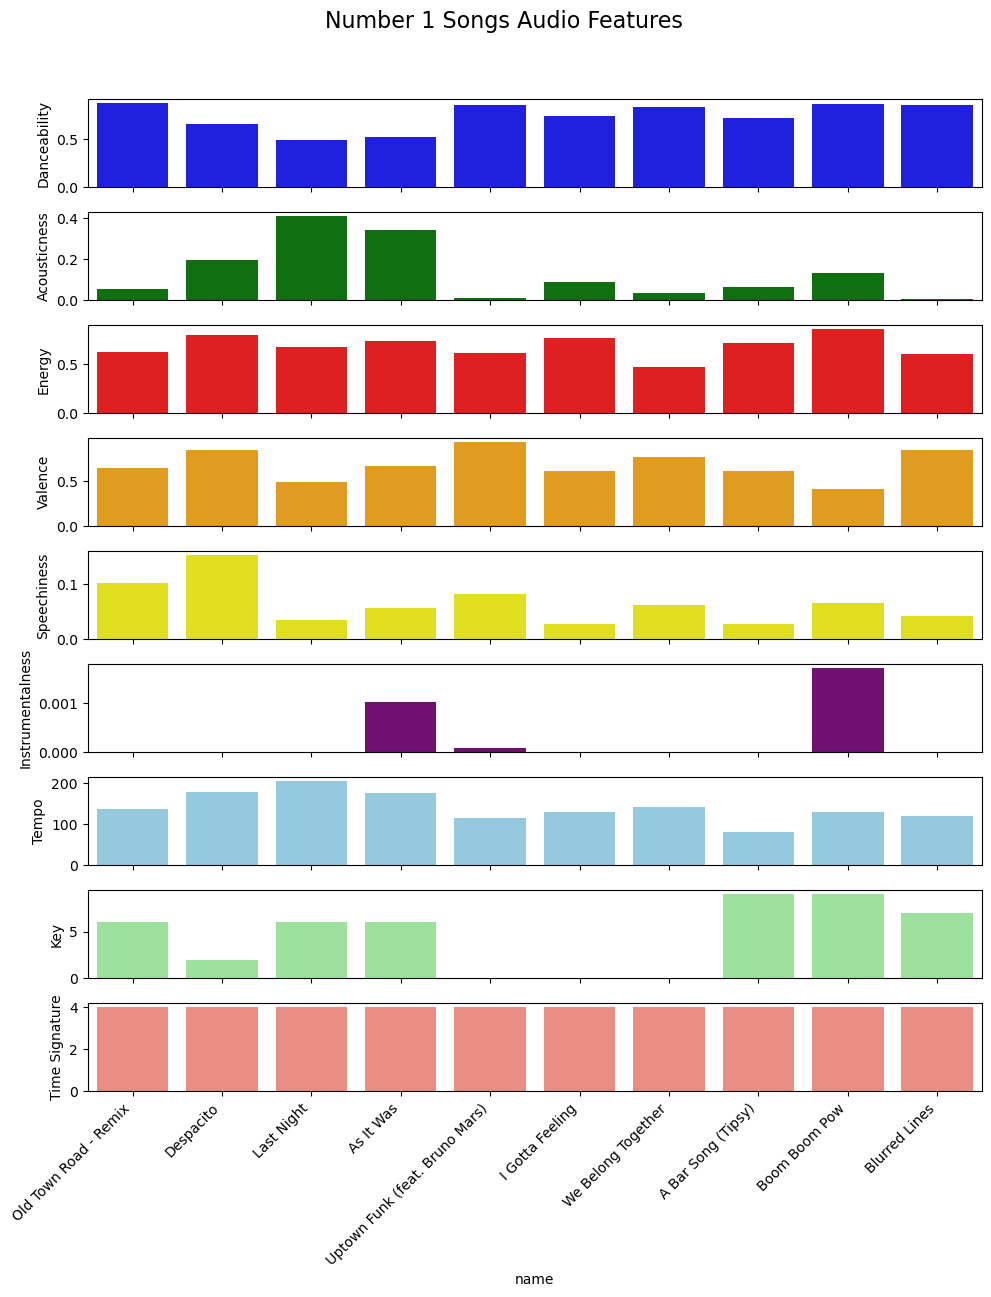

In [155]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9, 1, figsize=(10, 12), sharex=True)
fig.suptitle('Number 1 Songs Audio Features', fontsize=16)

# 2. Plot each column on its respective axis
sns.barplot(data=top10join, x='name', y='danceability', ax=ax1, color='blue')
sns.barplot(data=top10join, x='name', y='acousticness', ax=ax2, color='green')
sns.barplot(data=top10join, x='name', y='energy', ax=ax3, color='red')
sns.barplot(data=top10join, x='name', y='valence', ax=ax4, color='orange')
sns.barplot(data=top10join, x='name', y='speechiness', ax=ax5, color='yellow')
sns.barplot(data=top10join, x='name', y='instrumentalness', ax=ax6, color='purple')
sns.barplot(data=top10join, x='name', y='tempo', ax=ax7, color='skyblue')
sns.barplot(data=top10join, x='name', y='key', ax=ax8, color='lightgreen')
sns.barplot(data=top10join, x='name', y='time_signature', ax=ax9, color='salmon')

# 3. Customizing labels for clarity
ax1.set_ylabel('Danceability')
ax2.set_ylabel('Acousticness')
ax3.set_ylabel('Energy')
ax4.set_ylabel('Valence')
ax5.set_ylabel('Speechiness')
ax6.set_ylabel('Instrumentalness')
ax7.set_ylabel('Tempo')
ax8.set_ylabel('Key')
ax9.set_ylabel('Time Signature')

# 4. Clean up layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for the suptitle
plt.xticks(rotation=45, ha='right')
plt.show()

### *Findings*:

### When we look at the biggest hit of them all, Old Town Road, we see that it perfectly follows the analysis of top hit song. The blue bar for danceability is extremely high which means the song is built to make people move. This is a pattern we see across almost all these massive hits like Uptown Funk and Boom Boom Pow. They all share that same tall blue bar. Even though they come from different years and styles the data shows that keeping the energy up and the rhythm strong is the most reliable way to stay at number one for a long time.

### However there is some room for difference when it comes to the instruments and the speed. While Old Town Road keeps it electronic the song Last Night stands out with a very tall dark green bar for acousticness. It also has one of the highest speeds on the chart which makes it quite unique compared to the others. On the other hand a song like Despacito sets itself apart with the highest yellow bar for speechiness. This shows that while the beat matters using real instruments or a lot of lyrics can still work if the energy is right.

### Despite these differences in style two things remain completely frozen for every single song on this list. The purple graph for instrumentalness is flat at zero for almost everyone which confirms that a song without singing has basically no chance of reaching this level of success. The red bars at the bottom tell the same story about rhythm. Every single one of these chart toppers uses a time signature of four. From Mariah Carey in the 2000s to the hits of today the heartbeat of a massive number one song never changes.

## *So, What is the formula for creating a Number 1 hit that stays at the top?**

### To secure the longest reign at the top of the charts you must follow a strict set of unbreakable rules. The most important requirement is that the song must be built to make people move, as high danceability is the one trait that connects almost every legend on the list. You also need to ensure that the track relies heavily on a vocal performance because the data confirms that purely instrumental music has effectively zero chance of success. Beneath it all you must lock the rhythm into a standard count of four beats per measure, which serves as the frozen heartbeat that drives every single massive hit.

### However, you do have the freedom to change the texture of the sound without losing your spot at number one. The formula works just as well for songs that use raw acoustic instruments as it does for those that rely on heavy electronic beats. You can also experiment with the density of the lyrics, using rapid speech or simple melodies to set yourself apart. This proves that as long as you respect the core rules of high energy and steady timing, you can dress the music in different styles and still create a record-breaking song.

# **Summary**

### To master the modern chart topper you must understand the concept of the "sad banger". The data shows that happy pop anthems have faded away and been replaced by a darker and calmer sound that still demands to be danced to. A winning song today combines a heavy and introspective atmosphere with a relentless electronic beat which ensures that the rhythm drives the track even when the feelings are sad.

### Beneath the mood the musical structure follows a rigid code that has barely changed in decades. The heartbeat of a number one hit is strictly locked to a time signature of 4 beats per measure with tempo around 128 beats per minutes or more, and usually centers around a specific musical key, in this case is 5/F. The rules also state that the human voice must be the undisputed star of the show because instrumental tracks have almost zero chance of reaching the top. You simply cannot have a massive hit without a singer.

### Finally the attitude of the lyrics has undergone a complete reversal from the polite hits of the past. Listeners now prefer songs that feel raw and honest which means using explicit language and mature themes is part of the winning formula. While you must keep the energy high and the timing steady you are free to experiment with the texture. Whether you choose acoustic sounds or digital beats the goal remains the same to create a song that is real enough to feel and rhythmic enough to move.

### Now, are you ready to create your first hit song?